In [17]:
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def sinal(z):
    return 1 if z > 0.5 else 0

In [18]:
def calcular_erro(alpha, X, Y, A):
    erro = 0
    N = len(X)
    for n in range(N):
        p_chapeu = sigmoid(sum(alpha * (A[n]) ))
        if(1 - p_chapeu)<np.e**-12:
            erro -= np.e**-12
        else:
            erro -= (Y[n] * np.log(p_chapeu) + (1 - Y[n]) * np.log(1 - p_chapeu))
    erro = erro/N
    return erro if erro > np.e**-12 else np.e**-12

In [19]:
def batche(lista, n):
    # Seleciona aleatoriamente n índices únicos da lista
    indices_aleatorios = random.sample(range(len(lista)), n)
    return indices_aleatorios

In [20]:
def CLogDKPd(X, Y, alpha, eta,epochs,d,batch_size):
    t=0
    E=[]
    N=len(X)
    A=np.dot(X,X.T)
    A=A**d
    
    for epoca in range(epochs):
        S=[]
        ordem =batche(X, batch_size)
        for i in ordem:
            p_chapeu=sigmoid(sum(alpha * (A[i])))
            S.append((p_chapeu-Y[i]) *(A[i]))
        S=np.array(np.sum(S,axis=0))
        alpha = alpha - eta * S
        E.append(calcular_erro(alpha, X, Y, A))
        print(alpha)
    return alpha, E

In [21]:
data = pd.read_csv('Ex2_D.csv', header=None)
X = np.array(data.iloc[:, :-1].values)
Y = np.array(data.iloc[:, -1].values)
eta = 0.1
epochs = 500
alpha = np.zeros(len(X))
d=2
batch_size = 4
alpha, E = CLogDKPd(X, Y, alpha, eta, epochs, d, batch_size)



[0.  0.  0.  0.1]
[-0.0433304  -0.13622155 -0.13622155 -0.0713026 ]
[0.04832342 0.13183473 0.13183473 0.5441675 ]
[-0.11102686 -0.3108916  -0.3108916  -0.1814406 ]
[0.04215876 0.11284293 0.11284293 0.70997728]
[-0.12426763 -0.34412387 -0.34412387 -0.0373995 ]
[0.0179659  0.0505804  0.0505804  0.80204596]
[-0.14753135 -0.40579857 -0.40579857  0.05488131]
[-0.00632306 -0.01737417 -0.01737417  0.88009097]
[-0.16981555 -0.47130363 -0.47130363  0.13580848]
[-0.02756185 -0.08392299 -0.08392299  0.9559318 ]
[-0.18906442 -0.53540394 -0.53540394  0.21454625]
[-0.04605277 -0.14980743 -0.14980743  1.02812607]
[-0.20545252 -0.59861387 -0.59861387  0.28997945]
[-0.06166694 -0.21469854 -0.21469854  1.0971528 ]
[-0.21890064 -0.66067985 -0.66067985  0.36248488]
[-0.07441276 -0.27854885 -0.27854885  1.16305021]
[-0.22942204 -0.72155306 -0.72155306  0.43210796]
[-0.08429324 -0.34125441 -0.34125441  1.22600613]
[-0.23703776 -0.78115152 -0.78115152  0.49901027]
[-0.09134691 -0.40276483 -0.40276483  1.2861

In [22]:
A=np.dot(X,X.T)
A=A**d
for n in range(len(X)):
    p_chapeu = sigmoid(sum(alpha * (A[n]) ))
    print(p_chapeu)
    print(sinal(p_chapeu))
    


0.7516547290539014
1
0.13557086619231787
0
0.13557086619231806
0
0.9035139554165007
1


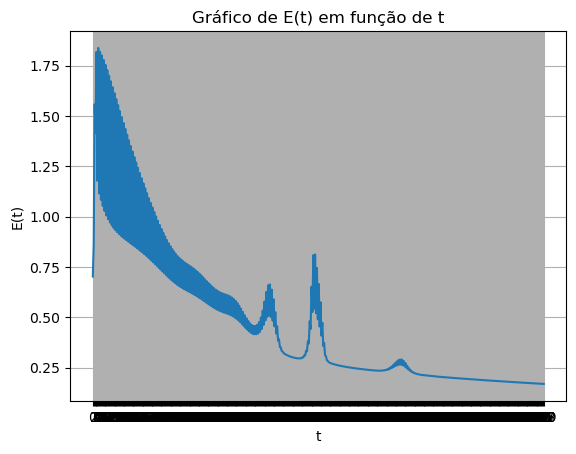

In [23]:
t = list(range(len(E)))

# Plotando o gráfico
plt.plot(t, E, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()

# MNIST

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# carregar dataset
(x_train_original, y_train_original), (x_test_original, y_test_original) = mnist.load_data()

# Filtrar dataset apenas para digito de 0 a 4
train_filter = np.where(y_train_original < 2)
test_filter = np.where(y_test_original < 2)

x_train_filter, y_train_filter = x_train_original[train_filter], y_train_original[train_filter]
x_test_filter, y_test_filter = x_test_original[test_filter], y_test_original[test_filter]

In [25]:
# ficar só os 100 primeiros de cada classe
def select_first_n_per_class(x, y, n):
    x_selected = []
    y_selected = []
    
    for digit in np.unique(y):
        idx = np.where(y == digit)[0][:n]
        x_selected.append(x[idx])
        y_selected.append(y[idx])
    
    return np.concatenate(x_selected), np.concatenate(y_selected)

In [26]:
x_train, y_train = select_first_n_per_class(x_train_filter, y_train_filter, n=100)
x_test, y_test = select_first_n_per_class(x_test_filter, y_test_filter, n=100)

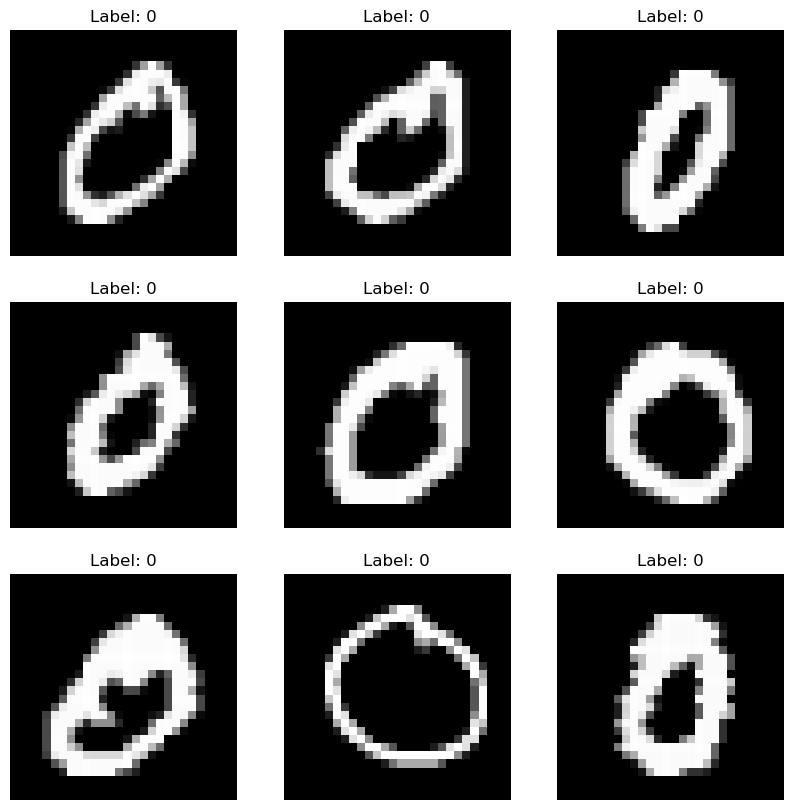

In [27]:
def plot_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()


plot_images(x_train, y_train)

In [28]:
x_train_array = x_train.reshape((len(x_train), 784))
x_test_array = x_test.reshape((len(x_test), 784))

# Normalizar os valores dentro da matriz de cada imagem
# (Sabendo que o valor máximo de cada pixel é 255)
x_train = x_train_array.astype('float32')
x_test = x_test_array.astype('float32')
#x_train = x_train/255
#x_test = x_test/255
print('X shape:', x_train.shape)

X shape: (200, 784)


In [29]:
eta = 0.1
epochs = 500
alpha = np.zeros(len(x_train))
d=2
batch_size = 200
alpha, E = CLogDKPd(x_train, y_train, alpha, eta, epochs, d, batch_size)


[-1.11483350e+14 -1.19482207e+14 -9.21948872e+13 -1.24668262e+14
 -1.66433120e+14 -1.35035156e+14 -1.45664369e+14 -2.91375426e+13
 -1.38564679e+14 -1.06024262e+14 -1.29046277e+14 -9.50604105e+13
 -1.40001589e+14 -4.33793165e+13 -1.34605642e+14 -6.70262530e+13
 -1.68877644e+14 -1.29121439e+14 -6.37804195e+13 -1.22087658e+14
 -1.08266554e+14 -9.25211369e+13 -1.08517785e+14 -2.85888458e+13
 -5.60959597e+13 -9.57180019e+13 -2.23815695e+13 -6.70429841e+13
 -2.38604454e+13 -7.96763745e+13 -1.47453997e+13 -1.44117191e+14
 -1.84977329e+14 -9.46732595e+13 -1.85973359e+14 -1.08302583e+14
 -9.12001576e+13 -1.17512444e+14 -1.88915462e+14 -2.19872244e+14
 -1.51924385e+14 -1.16904555e+14 -1.12532396e+14 -1.10506262e+14
 -9.53516378e+13 -1.40945341e+14 -1.50532245e+14 -9.92790331e+13
 -9.80519894e+13 -4.83907212e+13 -1.51951883e+14 -7.60480583e+13
 -1.34928637e+14 -5.43824649e+13 -1.08955427e+14 -1.33277441e+14
 -6.95614371e+13 -9.58103101e+13 -1.01335215e+14 -8.87776032e+13
 -9.84159124e+13 -1.38929

C:\Users\User\AppData\Local\Temp\ipykernel_17840\2403156624.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\User\AppData\Local\Temp\ipykernel_17840\2897490261.py:9: RuntimeWarning: divide by zero encountered in log
  erro -= (Y[n] * np.log(p_chapeu) + (1 - Y[n]) * np.log(1 - p_chapeu))
C:\Users\User\AppData\Local\Temp\ipykernel_17840\2897490261.py:9: RuntimeWarning: invalid value encountered in scalar multiply
  erro -= (Y[n] * np.log(p_chapeu) + (1 - Y[n]) * np.log(1 - p_chapeu))


[-4.72601984e+13 -3.53913997e+13  1.81651357e+13 -2.51934055e+13
 -8.16064594e+13 -6.91584356e+13 -3.23476762e+13 -1.59045366e+13
 -3.07563958e+13 -2.72463592e+13 -4.17962712e+13 -5.29469590e+13
 -4.41248296e+13 -2.16862345e+13 -6.39781924e+13 -3.14026059e+13
 -6.60568592e+13 -5.63493740e+13 -3.01873162e+13 -1.77005270e+13
 -5.85591527e+13 -4.77365927e+13 -5.92187081e+13 -1.74164625e+13
 -2.39397103e+13 -5.25493125e+13 -5.27986477e+12 -2.93861790e+13
 -1.29361662e+13 -4.19680991e+13 -4.90478508e+12 -8.71017763e+13
 -9.82076739e+13 -5.18595620e+13 -9.25035978e+13 -3.50493636e+13
 -4.37034871e+13 -5.98789912e+13 -7.82626208e+13 -9.22895593e+13
 -8.78502993e+13 -6.20696144e+13 -3.94927349e+13 -2.09685342e+13
 -4.82109397e+13 -9.03485318e+13 -7.32154682e+13 -5.03484210e+13
 -4.60601737e+13 -2.30306502e+13 -6.87526041e+13 -4.18818692e+13
 -7.64573134e+13 -2.00386816e+13 -2.62420042e+13 -6.91533114e+13
 -2.03970663e+13 -3.33709498e+13 -4.61708282e+13 -4.80292719e+13
 -3.16346875e+13 -6.69257

In [30]:
A=np.dot(x_test,x_test.T)
A=A**d
y_chapeu_all = []
for n in range(len(x_train)):
    p_chapeu = sigmoid(sum(alpha * (A[n]) ))
    print(p_chapeu)
    print(sinal(p_chapeu))
    y_chapeu_all.append(sinal(p_chapeu))

0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0


C:\Users\User\AppData\Local\Temp\ipykernel_17840\2403156624.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [31]:
len(y_test)

200

In [32]:
from sklearn.metrics import confusion_matrix

cm_fc = confusion_matrix(y_true=y_test, y_pred=y_chapeu_all)

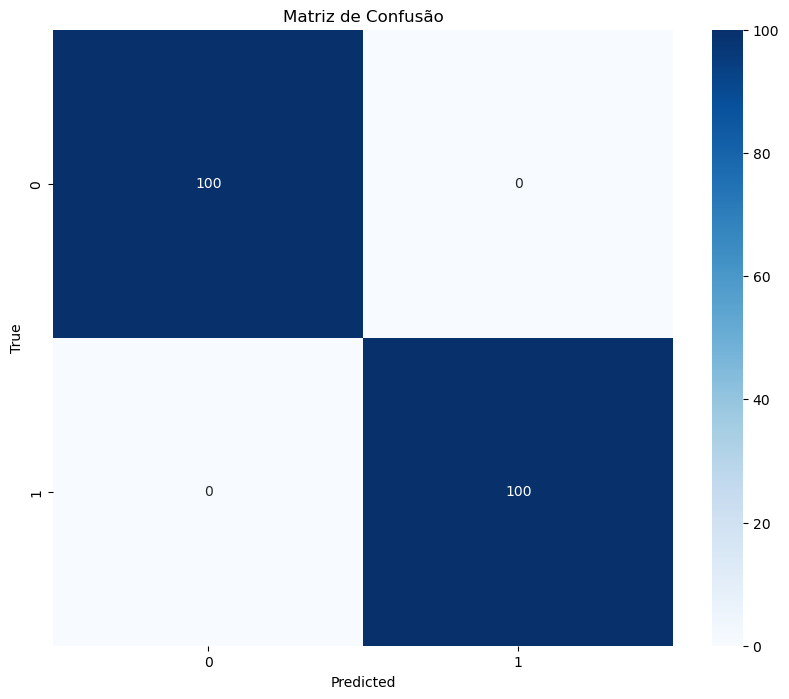

In [33]:
import seaborn as sns
import pandas as pd

# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fc, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusão')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

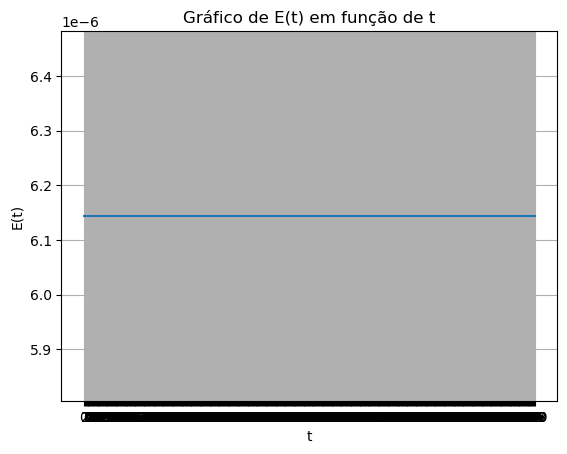

In [34]:
t = list(range(len(E)))

# Plotando o gráfico
plt.plot(t, E, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()

#### Agora vamos testar para vários tamanhos do dataset

In [35]:
x_train, y_train = select_first_n_per_class(x_train_filter, y_train_filter, n=50)
x_test, y_test = select_first_n_per_class(x_test_filter, y_test_filter, n=50)

In [36]:
x_train_array = x_train.reshape((len(x_train), 784))
x_test_array = x_test.reshape((len(x_test), 784))

# Normalizar os valores dentro da matriz de cada imagem
# (Sabendo que o valor máximo de cada pixel é 255)
x_train = x_train_array.astype('float32')
x_test = x_test_array.astype('float32')
#x_train = x_train/255
#x_test = x_test/255
print('X shape:', x_train.shape)

eta = 0.1
epochs = 500
alpha = np.zeros(len(x_train))
d=2
batch_size = 100
alpha, E = CLogDKPd(x_train, y_train, alpha, eta, epochs, d, batch_size)

X shape: (100, 784)
[-5.74192374e+13 -6.19916663e+13 -4.29525838e+13 -5.85388062e+13
 -9.25072873e+13 -8.03006883e+13 -7.60425050e+13 -1.97995119e+13
 -7.31674355e+13 -5.35621177e+13 -6.33244945e+13 -5.88696697e+13
 -7.25673899e+13 -2.86182122e+13 -7.96323092e+13 -3.83232843e+13
 -8.32661786e+13 -8.30451975e+13 -3.74211399e+13 -6.24829493e+13
 -5.78455800e+13 -5.79437268e+13 -6.99622197e+13 -1.71150001e+13
 -3.07500532e+13 -5.93212956e+13 -1.12766820e+13 -3.83088601e+13
 -1.60857651e+13 -5.18343119e+13 -9.17924060e+12 -8.89877126e+13
 -1.02388715e+14 -5.21621513e+13 -9.75512986e+13 -5.85492416e+13
 -4.98950042e+13 -6.56923595e+13 -9.29565057e+13 -1.12798634e+14
 -9.47860779e+13 -7.27038810e+13 -7.05410546e+13 -5.60238093e+13
 -4.78362888e+13 -8.64711889e+13 -8.74850948e+13 -6.28943393e+13
 -4.61082313e+13 -2.69954696e+13  7.63303349e+12  5.42685371e+12
  3.68271268e+12  4.59652465e+12  7.27102312e+12 -5.73606724e+12
  7.36403705e+12  7.43753436e+12  8.29324159e+12 -2.74852479e+12
  5.0

C:\Users\User\AppData\Local\Temp\ipykernel_17840\2403156624.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\User\AppData\Local\Temp\ipykernel_17840\2897490261.py:9: RuntimeWarning: divide by zero encountered in log
  erro -= (Y[n] * np.log(p_chapeu) + (1 - Y[n]) * np.log(1 - p_chapeu))
C:\Users\User\AppData\Local\Temp\ipykernel_17840\2897490261.py:9: RuntimeWarning: invalid value encountered in scalar multiply
  erro -= (Y[n] * np.log(p_chapeu) + (1 - Y[n]) * np.log(1 - p_chapeu))


[-1.57126972e+13 -8.23721617e+12  1.99934354e+13 -4.27475599e+10
 -3.31861863e+13 -3.77269725e+13 -5.85977823e+12 -1.14349316e+13
 -7.97080315e+12 -4.56337195e+12 -8.45934218e+12 -3.02468550e+13
 -1.03660761e+13 -1.47032843e+13 -3.25004927e+13 -1.46328875e+13
 -1.73321033e+13 -3.29020513e+13 -1.30561273e+13  1.05683721e+12
 -2.48626929e+13 -2.59081535e+13 -3.61971549e+13 -9.45624521e+12
 -1.13512238e+13 -2.93452330e+13 -4.91000431e+11 -1.14214817e+13
 -8.69442879e+12 -2.60426891e+13 -2.80203149e+12 -4.96908422e+13
 -4.35137114e+13 -2.41510840e+13 -3.62831560e+13 -1.03023026e+13
 -1.77020147e+13 -2.65047866e+13 -2.39955159e+13 -3.15596915e+13
 -4.97931025e+13 -3.48176828e+13 -2.51379505e+13 -7.61619022e+11
 -1.73592550e+13 -5.09788418e+13 -3.68777294e+13 -3.17796421e+13
 -1.20942867e+13 -1.02028930e+13  4.33538896e+13  5.10029323e+13
  2.49694643e+13  2.88854160e+13  4.14380927e+13  4.41831813e+13
  4.25997128e+13  4.39773711e+13  4.28743766e+13  5.55697151e+13
  2.84501370e+13  4.83902

In [37]:
A=np.dot(x_test,x_test.T)
A=A**d
y_chapeu_all = []
for n in range(len(x_train)):
    p_chapeu = sigmoid(sum(alpha * (A[n]) ))
    print(p_chapeu)
    print(sinal(p_chapeu))
    y_chapeu_all.append(sinal(p_chapeu))

0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
0
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
1


C:\Users\User\AppData\Local\Temp\ipykernel_17840\2403156624.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [38]:

from sklearn.metrics import confusion_matrix

cm_fc = confusion_matrix(y_true=y_test, y_pred=y_chapeu_all)

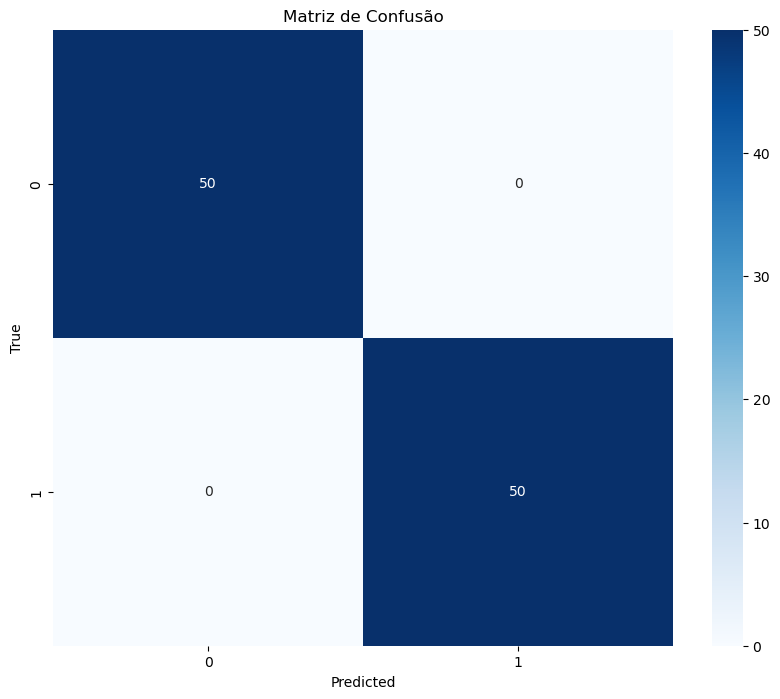

In [39]:
import seaborn as sns
import pandas as pd

# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fc, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusão')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

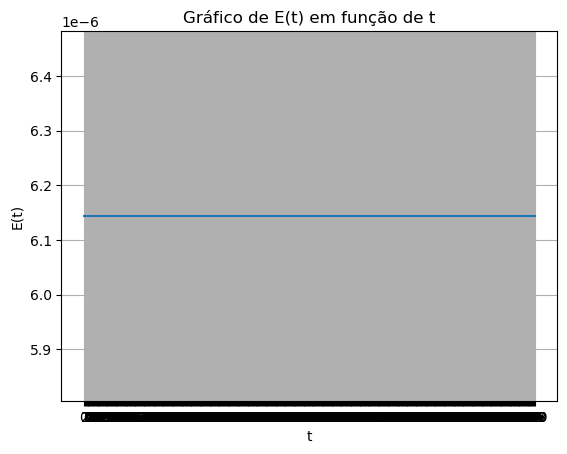

In [40]:
t = list(range(len(E)))

# Plotando o gráfico
plt.plot(t, E, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()

In [41]:
x_train, y_train = select_first_n_per_class(x_train_filter, y_train_filter, n=20)
x_test, y_test = select_first_n_per_class(x_test_filter, y_test_filter, n=20)

In [42]:
x_train_array = x_train.reshape((len(x_train), 784))
x_test_array = x_test.reshape((len(x_test), 784))

# Normalizar os valores dentro da matriz de cada imagem
# (Sabendo que o valor máximo de cada pixel é 255)
x_train = x_train_array.astype('float32')
x_test = x_test_array.astype('float32')
#x_train = x_train/255
#x_test = x_test/255
print('X shape:', x_train.shape)

eta = 0.1
epochs = 500
alpha = np.zeros(len(x_train))
d=2
batch_size = 40
alpha, E = CLogDKPd(x_train, y_train, alpha, eta, epochs, d, batch_size)

A=np.dot(x_test,x_test.T)
A=A**d
y_chapeu_all = []
for n in range(len(x_train)):
    p_chapeu = sigmoid(sum(alpha * (A[n]) ))
    print(p_chapeu)
    print(sinal(p_chapeu))
    y_chapeu_all.append(sinal(p_chapeu))

from sklearn.metrics import confusion_matrix

cm_fc = confusion_matrix(y_true=y_test, y_pred=y_chapeu_all)

X shape: (40, 784)
[-2.61977822e+13 -2.89278064e+13 -2.43072143e+13 -2.99905298e+13
 -4.11263587e+13 -3.25318250e+13 -3.81134265e+13 -7.53023268e+12
 -3.67591319e+13 -2.88934026e+13 -3.29800808e+13 -2.26175935e+13
 -3.53016616e+13 -1.03543923e+13 -3.26635262e+13 -1.63725988e+13
 -3.79883021e+13 -3.06710766e+13 -1.48686368e+13 -3.20116034e+13
  2.41088463e+12  1.52727231e+12  1.12759302e+12  1.43523984e+12
  2.30482746e+12 -3.29487090e+12  1.85017801e+12  2.08797827e+12
  2.28865632e+12 -1.50119724e+12  1.61955001e+12  2.27870979e+12
  2.76975242e+12  1.83929982e+12  1.43057879e+12  7.01975429e+11
  2.52201586e+12  1.68283170e+12  2.27124602e+12  1.11324470e+12]
[-2.16445768e+13 -2.21975172e+13 -1.42603956e+13 -2.12719858e+13
 -3.58476200e+13 -2.81162448e+13 -2.86076604e+13 -6.51241279e+12
 -2.84107279e+13 -2.23631822e+13 -2.66894264e+13 -1.99542340e+13
 -2.87064410e+13 -8.91916308e+12 -2.82509469e+13 -1.41554418e+13
 -3.02223081e+13 -2.58738414e+13 -1.30231235e+13 -2.39610034e+13
  1.2

C:\Users\User\AppData\Local\Temp\ipykernel_17840\2403156624.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\User\AppData\Local\Temp\ipykernel_17840\2897490261.py:9: RuntimeWarning: divide by zero encountered in log
  erro -= (Y[n] * np.log(p_chapeu) + (1 - Y[n]) * np.log(1 - p_chapeu))
C:\Users\User\AppData\Local\Temp\ipykernel_17840\2897490261.py:9: RuntimeWarning: invalid value encountered in scalar multiply
  erro -= (Y[n] * np.log(p_chapeu) + (1 - Y[n]) * np.log(1 - p_chapeu))


[-1.17065578e+13 -8.96760204e+12  2.48000387e+12 -4.57588893e+12
 -2.48376388e+13 -1.92437902e+13 -1.22202565e+13 -4.88921496e+12
 -1.27475510e+13 -1.08937410e+13 -1.45426770e+13 -1.41399025e+13
 -1.49234178e+13 -6.42143260e+12 -1.75544153e+13 -9.21854149e+12
 -1.44010374e+13 -1.56946176e+13 -8.69015683e+12 -8.32503336e+12
  2.43295478e+13  2.27581807e+13  1.19090591e+13  1.40655428e+13
  2.28003826e+13  2.46720053e+13  2.00538499e+13  2.42759003e+13
  2.24994944e+13  2.60032933e+13  1.40563454e+13  2.71187488e+13
  3.28238102e+13  1.70375800e+13  1.46405962e+13  9.81499177e+12
  3.24721997e+13  1.62135650e+13  3.35161685e+13  1.07394334e+13]
[-1.17065578e+13 -8.96760204e+12  2.48000387e+12 -4.57588893e+12
 -2.48376388e+13 -1.92437902e+13 -1.22202565e+13 -4.88921496e+12
 -1.27475510e+13 -1.08937410e+13 -1.45426770e+13 -1.41399025e+13
 -1.49234178e+13 -6.42143260e+12 -1.75544153e+13 -9.21854149e+12
 -1.44010374e+13 -1.56946176e+13 -8.69015683e+12 -8.32503336e+12
  2.43295478e+13  2.2758

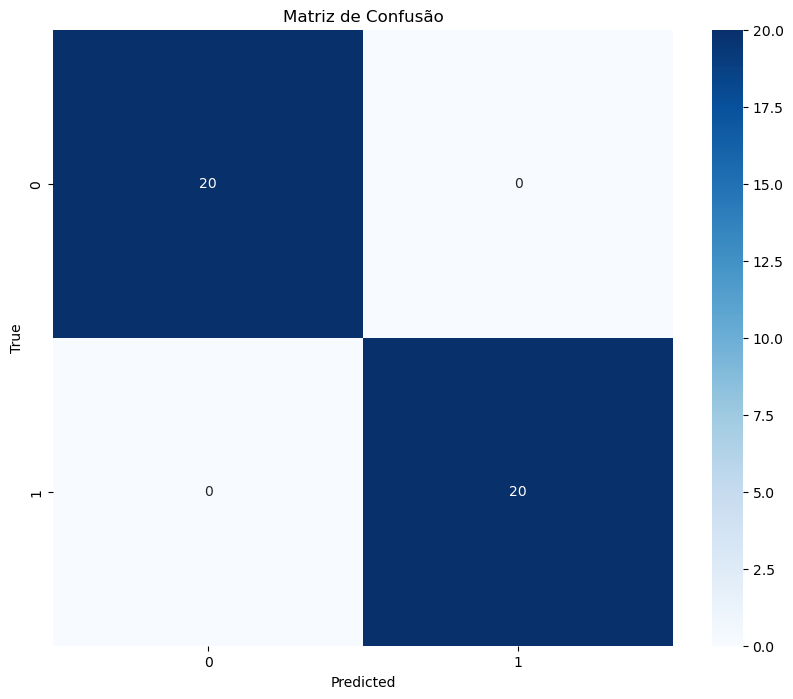

In [43]:
import seaborn as sns
import pandas as pd

# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fc, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusão')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

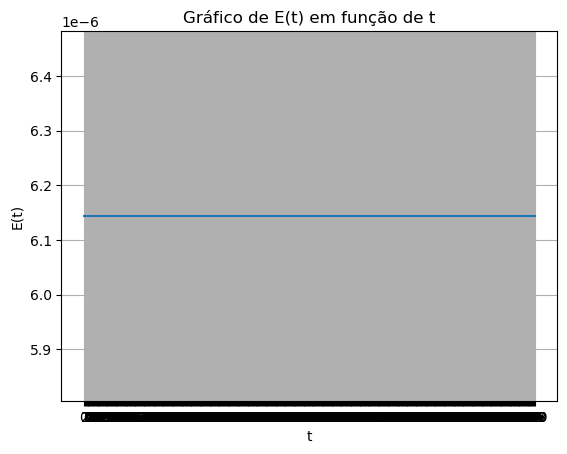

In [44]:
t = list(range(len(E)))

# Plotando o gráfico
plt.plot(t, E, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()